In [1]:
pip install sportsdataverse

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.6/19.6 MB 44.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.8/171.8 kB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.9/440.9 kB 22.2 MB/s eta 0:00:00
  Attempting uninstall: polars
    Found existing installation: polars 0.20.2
    Uninstalling polars-0.20.2:
      Successfully uninstalled polars-0.20.2


In [2]:
pip install git+https://github.com/ddm7018/Elo.git

  Cloning https://github.com/ddm7018/Elo.git to /tmp/pip-req-build-6e2m3y85
  Running command git clone --filter=blob:none --quiet https://github.com/ddm7018/Elo.git /tmp/pip-req-build-6e2m3y85
  Resolved https://github.com/ddm7018/Elo.git to commit ad6c07577aa58ff29321963534d6bb71e675cca9
  Preparing metadata (setup.py) ... done
  Created wheel for elosports: filename=elosports-0.1.1-py3-none-any.whl size=4347 sha256=1bd658606d9211f2a878bd4dfc02c69c72cae8d3acca8c397d40ebe3870def80
  Stored in directory: /tmp/pip-ephem-wheel-cache-643tha07/wheels/50/64/f5/a9a40dca981d552c3a46e43487cfcc93904f93b4a8bf5ec20c
Successfully built elosports


In [36]:
import sportsdataverse.mbb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from elosports.elo import Elo
from matplotlib import pyplot
import csv

In [4]:
##Data From 2016-2022
##Columns include 'game_id', 'season', 'season_type', 'game_date', 'game_date_time','team_id', 'team_uid', 'team_slug', 'team_location', 'team_name',
##       'team_abbreviation', 'team_display_name', 'team_short_display_name',
##       'team_color', 'team_alternate_color', 'team_logo', 'team_home_away',
##       'team_score', 'team_winner', 'assists', 'blocks', 'defensive_rebounds',
##       'field_goal_pct', 'field_goals_made', 'field_goals_attempted',
##       'flagrant_fouls', 'fouls', 'free_throw_pct', 'free_throws_made',
##       'free_throws_attempted', 'largest_lead', 'offensive_rebounds', 'steals',
##       'team_turnovers', 'technical_fouls', 'three_point_field_goal_pct',
##       'three_point_field_goals_made', 'three_point_field_goals_attempted',
##       'total_rebounds', 'total_technical_fouls', 'total_turnovers',
##       'turnovers', 'opponent_team_id', 'opponent_team_uid',
##       'opponent_team_slug', 'opponent_team_location', 'opponent_team_name',
##       'opponent_team_abbreviation', 'opponent_team_display_name',
##       'opponent_team_short_display_name', 'opponent_team_color',
##       'opponent_team_alternate_color', 'opponent_team_logo',
##       'opponent_team_score'
mbb_df = sportsdataverse.mbb.load_mbb_team_boxscore(seasons=range(2016,2022), return_as_pandas=True)
#Replacing "home" and "away" values with "1" and "0" respectively
#Then sorting to make the away team first and home team second in each set of two rows
def home_away(x):
  if x=="home":
    return 1
  else:
    return 0
mbb_df["team_home_away"]=mbb_df["team_home_away"].apply(home_away)
mbb_df.sort_values(by=["game_id", "team_home_away"], inplace=True)
mbb_df[["team_name", "team_abbreviation", "team_display_name", "team_short_display_name"]]

100%|██████████| 6/6 [00:03<00:00,  1.57it/s]


,team_name,team_abbreviation,team_display_name,team_short_display_name
11030,Wildcats,UK,Kentucky Wildcats,Kentucky
11031,Blue Devils,DUKE,Duke Blue Devils,Duke
10990,Jayhawks,KU,Kansas Jayhawks,Kansas
10991,Spartans,MSU,Michigan State Spartans,Michigan St
8830,Mountaineers,WVU,West Virginia Mountaineers,West Virginia
...,...,...,...,...
59269,Chanticleers,CCU,Coastal Carolina Chanticleers,Coast Car
59266,Knights,BELL,Bellarmine Knights,Bellarmine
59267,Waves,PEPP,Pepperdine Waves,Pepperdine
59264,Chanticleers,CCU,Coastal Carolina Chanticleers,Coast Car


In [5]:
#Creating another dataframe with rows sorted to make the away team second and home team first in each set of two rows
mbb_df_reversed_home_away = mbb_df.sort_values(by=["game_id", "team_home_away"], ascending=[True, False])
mbb_df_reversed_home_away

,game_id,season,season_type,game_date,game_date_time,team_id,team_uid,team_slug,team_location,team_name,...,opponent_team_slug,opponent_team_location,opponent_team_name,opponent_team_abbreviation,opponent_team_display_name,opponent_team_short_display_name,opponent_team_color,opponent_team_alternate_color,opponent_team_logo,opponent_team_score
11031,400809203,2016,2,2015-11-17,2015-11-17 19:30:00-05:00,150,s:40~l:41~t:150,duke-blue-devils,Duke,Blue Devils,...,kentucky-wildcats,Kentucky,Wildcats,UK,Kentucky Wildcats,Kentucky,005DAA,ffffff,https://a.espncdn.com/i/teamlogos/ncaa/500/96.png,74
11030,400809203,2016,2,2015-11-17,2015-11-17 19:30:00-05:00,96,s:40~l:41~t:96,kentucky-wildcats,Kentucky,Wildcats,...,duke-blue-devils,Duke,Blue Devils,DUKE,Duke Blue Devils,Duke,013088,ffffff,https://a.espncdn.com/i/teamlogos/ncaa/500/150...,63
10991,400809204,2016,2,2015-11-17,2015-11-17 22:21:00-05:00,127,s:40~l:41~t:127,michigan-state-spartans,Michigan State,Spartans,...,kansas-jayhawks,Kansas,Jayhawks,KU,Kansas Jayhawks,Kansas,0051ba,e8000d,https://a.espncdn.com/i/teamlogos/ncaa/500/230...,73
10990,400809204,2016,2,2015-11-17,2015-11-17 22:21:00-05:00,2305,s:40~l:41~t:2305,kansas-jayhawks,Kansas,Jayhawks,...,michigan-state-spartans,Michigan State,Spartans,MSU,Michigan State Spartans,Michigan St,18453B,ffffff,https://a.espncdn.com/i/teamlogos/ncaa/500/127...,79
8831,400809205,2016,2,2015-12-08,2015-12-08 19:00:00-05:00,258,s:40~l:41~t:258,virginia-cavaliers,Virginia,Cavaliers,...,west-virginia-mountaineers,West Virginia,Mountaineers,WVU,West Virginia Mountaineers,West Virginia,FFC600,eaaa00,https://a.espncdn.com/i/teamlogos/ncaa/500/277...,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59268,401312698,2021,3,2021-03-23,2021-03-23 17:30:00-04:00,56,s:40~l:41~t:56,stetson-hatters,Stetson,Hatters,...,coastal-carolina-chanticleers,Coastal Carolina,Chanticleers,CCU,Coastal Carolina Chanticleers,Coast Car,007073,876447,https://a.espncdn.com/i/teamlogos/ncaa/500/324...,77
59267,401312699,2021,3,2021-03-23,2021-03-23 20:00:00-04:00,2492,s:40~l:41~t:2492,pepperdine-waves,Pepperdine,Waves,...,bellarmine-knights,Bellarmine,Knights,BELL,Bellarmine Knights,Bellarmine,000000,<NA>,https://a.espncdn.com/i/teamlogos/ncaa/500/91.png,71
59266,401312699,2021,3,2021-03-23,2021-03-23 20:00:00-04:00,91,s:40~l:41~t:91,bellarmine-knights,Bellarmine,Knights,...,pepperdine-waves,Pepperdine,Waves,PEPP,Pepperdine Waves,Pepperdine,003A72,dc762f,https://a.espncdn.com/i/teamlogos/ncaa/500/249...,82
59265,401312700,2021,3,2021-03-24,2021-03-24 20:00:00-04:00,2492,s:40~l:41~t:2492,pepperdine-waves,Pepperdine,Waves,...,coastal-carolina-chanticleers,Coastal Carolina,Chanticleers,CCU,Coastal Carolina Chanticleers,Coast Car,007073,876447,https://a.espncdn.com/i/teamlogos/ncaa/500/324...,61


In [6]:
#Creating dataframe with differences between key metrics for home team
new_mbb_df_home = mbb_df.groupby("game_id").agg({"field_goal_pct": "diff", "three_point_field_goal_pct": "diff", "free_throw_pct": "diff", "free_throws_made": "diff", "free_throws_attempted": "diff", "assists": "diff", "turnovers": "diff", "offensive_rebounds": "diff", "defensive_rebounds": "diff", "total_rebounds": "diff"}).dropna()
new_mbb_df_home["team_home_away"] = mbb_df["team_home_away"]
win_home = mbb_df.iloc[1::2, 18]
new_mbb_df_home['win'] = win_home
new_mbb_df_home[["game_id", "team_name", "team_abbreviation", "team_display_name", "team_short_display_name", "opponent_team_abbreviation", "game_date"]] = mbb_df[["game_id", "team_name", "team_abbreviation", "team_display_name", "team_short_display_name", "opponent_team_abbreviation", "game_date"]]
#Replacing "True" and "False" values in win column with their corresponding "1" and "0" values
def flagg_win_home(x):
  if x:
    return 1
  else:
    return 0
new_mbb_df_home["win"]=new_mbb_df_home["win"].apply(flagg_win_home)
new_mbb_df_home

,field_goal_pct,three_point_field_goal_pct,free_throw_pct,free_throws_made,free_throws_attempted,assists,turnovers,offensive_rebounds,defensive_rebounds,total_rebounds,team_home_away,win,game_id,team_name,team_abbreviation,team_display_name,team_short_display_name,opponent_team_abbreviation,game_date
11031,-4.099999999999994,8.5,-0.20000000000000284,3,5,-6,7,-2,2,0,1,0,400809203,Blue Devils,DUKE,Duke Blue Devils,Duke,UK,2015-11-17
10991,11.900000000000006,22.9,7.5,-10,-14,8,10,-2,12,10,1,1,400809204,Spartans,MSU,Michigan State Spartans,Michigan St,KU,2015-11-17
8831,22.799999999999997,23.2,7.899999999999999,1,-1,3,1,-7,12,5,1,1,400809205,Cavaliers,UVA,Virginia Cavaliers,Virginia,WVU,2015-12-08
8795,-3.799999999999997,19.800000000000004,-4.299999999999997,-14,-17,-1,-6,-8,-13,-21,1,0,400809206,Huskies,CONN,UConn Huskies,UConn,MD,2015-12-08
10819,4.5,2.4999999999999964,17.0,7,3,8,-8,5,3,8,1,1,400809209,Horned Frogs,TCU,TCU Horned Frogs,TCU,HCU,2015-11-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59283,5.0,-1.9999999999999964,17.299999999999997,2,-1,5,-3,7,8,15,1,1,401312696,Waves,PEPP,Pepperdine Waves,Pepperdine,LONG,2021-03-22
59275,-8.100000000000001,-11.299999999999997,-16.599999999999994,-4,-1,3,0,3,-4,-1,1,0,401312697,Black Knights,ARMY,Army Black Knights,Army,BELL,2021-03-22
59269,3.0,-5.800000000000001,-16.499999999999993,1,9,7,-5,3,-3,0,1,1,401312698,Chanticleers,CCU,Coastal Carolina Chanticleers,Coast Car,STET,2021-03-23
59267,14.200000000000003,5.300000000000004,-15.900000000000006,2,5,5,3,1,12,13,1,1,401312699,Waves,PEPP,Pepperdine Waves,Pepperdine,BELL,2021-03-23


In [7]:
#Creating dataframe with differences between key metrics for away team
new_mbb_df_away = mbb_df_reversed_home_away.groupby("game_id").agg({"field_goal_pct": "diff", "three_point_field_goal_pct": "diff", "free_throw_pct": "diff", "free_throws_made": "diff", "free_throws_attempted": "diff", "assists": "diff", "turnovers": "diff", "offensive_rebounds": "diff", "defensive_rebounds": "diff", "total_rebounds": "diff"}).dropna()
new_mbb_df_away["team_home_away"] = mbb_df_reversed_home_away["team_home_away"]
win_away = mbb_df_reversed_home_away.iloc[1::2, 18]
new_mbb_df_away['win'] = win_away
new_mbb_df_away[["game_id", "team_name", "team_abbreviation", "team_display_name", "team_short_display_name", "opponent_team_abbreviation", "game_date"]] = mbb_df_reversed_home_away[["game_id", "team_name", "team_abbreviation", "team_display_name", "team_short_display_name", "opponent_team_abbreviation", "game_date"]]
#Replacing "True" and "False" values in win column with their corresponding "1" and "0" values
def flagg_win_away(x):
  if x:
    return 1
  else:
    return 0
new_mbb_df_away["win"]=new_mbb_df_away["win"].apply(flagg_win_away)
new_mbb_df_away

,field_goal_pct,three_point_field_goal_pct,free_throw_pct,free_throws_made,free_throws_attempted,assists,turnovers,offensive_rebounds,defensive_rebounds,total_rebounds,team_home_away,win,game_id,team_name,team_abbreviation,team_display_name,team_short_display_name,opponent_team_abbreviation,game_date
11030,4.099999999999994,-8.5,0.20000000000000284,-3,-5,6,-7,2,-2,0,0,1,400809203,Wildcats,UK,Kentucky Wildcats,Kentucky,DUKE,2015-11-17
10990,-11.900000000000006,-22.9,-7.5,10,14,-8,-10,2,-12,-10,0,0,400809204,Jayhawks,KU,Kansas Jayhawks,Kansas,MSU,2015-11-17
8830,-22.799999999999997,-23.2,-7.899999999999999,-1,1,-3,-1,7,-12,-5,0,0,400809205,Mountaineers,WVU,West Virginia Mountaineers,West Virginia,UVA,2015-12-08
8794,3.799999999999997,-19.800000000000004,4.299999999999997,14,17,1,6,8,13,21,0,1,400809206,Terrapins,MD,Maryland Terrapins,Maryland,CONN,2015-12-08
10818,-4.5,-2.4999999999999964,-17.0,-7,-3,-8,8,-5,-3,-8,0,0,400809209,Huskies,HCU,Houston Christian Huskies,Hou Christian,TCU,2015-11-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59282,-5.0,1.9999999999999964,-17.299999999999997,-2,1,-5,3,-7,-8,-15,0,0,401312696,Lancers,LONG,Longwood Lancers,Longwood,PEPP,2021-03-22
59274,8.100000000000001,11.299999999999997,16.599999999999994,4,1,-3,0,-3,4,1,0,1,401312697,Knights,BELL,Bellarmine Knights,Bellarmine,ARMY,2021-03-22
59268,-3.0,5.800000000000001,16.499999999999993,-1,-9,-7,5,-3,3,0,0,0,401312698,Hatters,STET,Stetson Hatters,Stetson,CCU,2021-03-23
59266,-14.200000000000003,-5.300000000000004,15.900000000000006,-2,-5,-5,-3,-1,-12,-13,0,0,401312699,Knights,BELL,Bellarmine Knights,Bellarmine,PEPP,2021-03-23


In [8]:
#Combining the previous two dataframes
new_mbb_df = pd.concat([new_mbb_df_home, new_mbb_df_away])
new_mbb_df.sort_values(by=["team_abbreviation", "game_date"], inplace=True)
new_mbb_df.reset_index(inplace=True)
new_mbb_df.drop(["index"], axis=1, inplace=True)
new_mbb_df

,field_goal_pct,three_point_field_goal_pct,free_throw_pct,free_throws_made,free_throws_attempted,assists,turnovers,offensive_rebounds,defensive_rebounds,total_rebounds,team_home_away,win,game_id,team_name,team_abbreviation,team_display_name,team_short_display_name,opponent_team_abbreviation,game_date
0,0.5,1.7000000000000028,-2.700000000000003,-6,-9,-1,-4,-4,-7,-11,0,1,400825721,Bulldogs,AAMU,Alabama A&M Bulldogs,Alabama A&M,TULN,2015-11-13
1,7.300000000000004,12.900000000000002,12.399999999999999,2,-1,9,-6,-9,-5,-14,1,1,400845580,Bulldogs,AAMU,Alabama A&M Bulldogs,Alabama A&M,SEMO,2015-11-19
2,1.5999999999999943,15.899999999999999,-7.5,5,10,0,0,3,3,6,1,1,400847293,Bulldogs,AAMU,Alabama A&M Bulldogs,Alabama A&M,OKW,2015-11-21
3,1.8999999999999986,2.8999999999999986,-7.0,-2,-1,4,7,5,2,7,0,1,400845546,Bulldogs,AAMU,Alabama A&M Bulldogs,Alabama A&M,JVST,2015-11-24
4,3.6000000000000014,-0.1999999999999993,12.200000000000003,-7,-12,4,2,-3,4,1,0,0,400845571,Bulldogs,AAMU,Alabama A&M Bulldogs,Alabama A&M,MUR,2015-11-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67779,-14.5,-21.299999999999997,15.099999999999994,6,4,-2,-7,10,-6,4,1,1,401258560,Penguins,YSU,Youngstown State Penguins,Youngstown St,PFW,2021-02-13
67780,-2.1999999999999957,-15.3,2.0999999999999943,-3,-5,0,-3,-1,-1,-2,1,0,401258525,Penguins,YSU,Youngstown State Penguins,Youngstown St,IUPU,2021-02-19
67781,16.1,3.3000000000000007,7.8999999999999915,-1,-4,-5,3,-7,9,2,1,1,401258526,Penguins,YSU,Youngstown State Penguins,Youngstown St,IUPU,2021-02-20
67782,3.1000000000000014,-0.20000000000000284,-25.0,3,5,3,-9,2,-1,1,1,1,401286976,Penguins,YSU,Youngstown State Penguins,Youngstown St,UIC,2021-02-25


In [9]:
#Extracting the previous three games before a certain game and returning the averages of previous three games
new_mbb_df_rolling = new_mbb_df.groupby(by="team_abbreviation")[["field_goal_pct", "three_point_field_goal_pct", "free_throw_pct", "free_throws_made", "free_throws_attempted", "assists", "turnovers", "offensive_rebounds", "defensive_rebounds", "total_rebounds"]].rolling(window=3, min_periods=3, closed="left").mean().dropna()
new_mbb_df_rolling = new_mbb_df_rolling.reset_index().set_index("level_1")
new_mbb_df_rolling[["game_id", "game_date", "team_home_away", "win", "opponent_team_abbreviation"]] = new_mbb_df[["game_id", "game_date", "team_home_away", "win", "opponent_team_abbreviation"]]
new_mbb_df_rolling

,team_abbreviation,field_goal_pct,three_point_field_goal_pct,free_throw_pct,free_throws_made,free_throws_attempted,assists,turnovers,offensive_rebounds,defensive_rebounds,total_rebounds,game_id,game_date,team_home_away,win,opponent_team_abbreviation
level_1,,,,,,,,,,,,,,,,
3,AAMU,3.133333,10.166667,0.733333,0.333333,0.000000,2.666667,-3.333333,-3.333333,-3.000000,-6.333333,400845546,2015-11-24,0,1,JVST
4,AAMU,3.600000,10.566667,-0.700000,1.666667,2.666667,4.333333,0.333333,-0.333333,0.000000,-0.333333,400845571,2015-11-28,0,0,MUR
5,AAMU,2.366667,6.200000,-0.766667,-1.333333,-1.000000,2.666667,3.000000,1.666667,3.000000,4.666667,400835660,2015-12-12,0,0,SLU
6,AAMU,0.466667,-1.633333,-11.800000,-6.666667,-6.000000,1.000000,2.333333,0.000000,-1.333333,-1.333333,400843499,2015-12-16,0,0,WKU
7,AAMU,-1.900000,-2.833333,-16.333333,-12.666667,-12.666667,0.666667,0.000000,0.000000,-5.333333,-5.333333,400843840,2015-12-22,0,0,EVAN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67779,YSU,0.133333,7.266667,23.200000,5.000000,2.666667,1.000000,-3.666667,3.333333,1.333333,4.666667,401258560,2021-02-13,1,1,PFW
67780,YSU,-4.166667,-0.166667,22.400000,3.000000,-0.666667,3.000000,-6.333333,5.333333,-2.000000,3.333333,401258525,2021-02-19,1,0,IUPU
67781,YSU,-6.766667,-6.800000,12.400000,2.000000,-0.333333,2.000000,-5.000000,5.666667,-1.333333,4.333333,401258526,2021-02-20,1,1,IUPU


In [10]:
#First we will see if single-game in-game data is a good indicator of the outcome of a game
#Splitting the single-game in-game data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(new_mbb_df.iloc[:, :10], new_mbb_df["win"])
logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)
y_pred = logistic_model.predict(x_test)

In [11]:
#Creating the confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[8232,  330],
       [ 347, 8037]])

Text(0.5, 427.9555555555555, 'Predicted label')

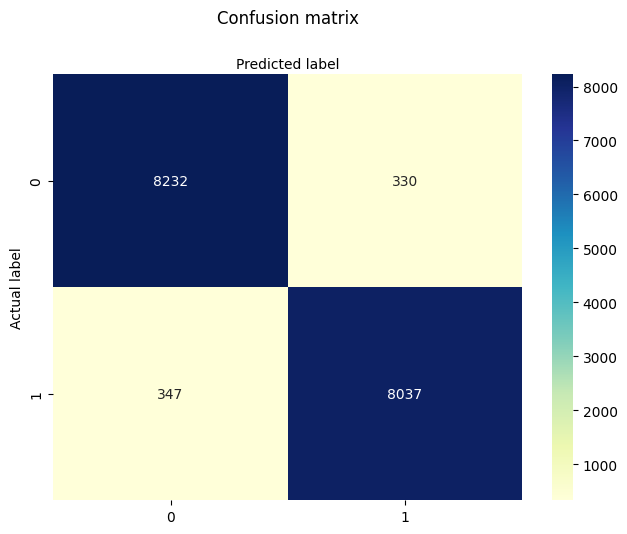

In [12]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
#Creating a heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [13]:
target_names = ['lose', 'win']
print(classification_report(y_test, y_pred, target_names=target_names))
#As you can see, using single-game in-game data is obviously predictive of a game's result, which is a good start.

              precision    recall  f1-score   support

        lose       0.96      0.96      0.96      8562
         win       0.96      0.96      0.96      8384

    accuracy                           0.96     16946
   macro avg       0.96      0.96      0.96     16946
weighted avg       0.96      0.96      0.96     16946



In [14]:
#Splitting the 3-game moving average data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(new_mbb_df_rolling.iloc[:, 1:11], new_mbb_df_rolling["win"])
logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)
y_pred = logistic_model.predict(x_test)

In [15]:
#Creating the confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[4261, 3760],
       [3083, 5240]])

Text(0.5, 427.9555555555555, 'Predicted label')

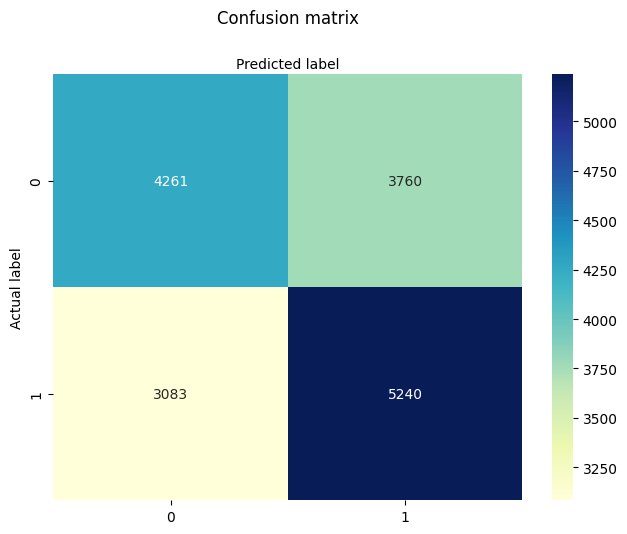

In [16]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
#Creating a heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [17]:
target_names = ['lose', 'win']
print(classification_report(y_test, y_pred, target_names=target_names))
#58% accuracy is better than guessing but is mediocre at best

              precision    recall  f1-score   support

        lose       0.58      0.53      0.55      8021
         win       0.58      0.63      0.60      8323

    accuracy                           0.58     16344
   macro avg       0.58      0.58      0.58     16344
weighted avg       0.58      0.58      0.58     16344



In [18]:
#As you can see, the model is still definitely better than randomly picking a result.
new_mbb_df_rolling["win"].mean()

0.5086884694220944

In [19]:
#Standardizing the dataframe
scaler = StandardScaler()
new_mbb_df_rolling_standardized = pd.DataFrame(scaler.fit_transform((new_mbb_df_rolling.iloc[:, 1:11])), index=new_mbb_df_rolling.index, columns=new_mbb_df_rolling.columns[1:11])
new_mbb_df_rolling_standardized[["team_abbreviation", "team_home_away", "win", "opponent_team_abbreviation"]] = new_mbb_df_rolling[["team_abbreviation", "team_home_away", "win", "opponent_team_abbreviation"]]
new_mbb_df_rolling_standardized

,field_goal_pct,three_point_field_goal_pct,free_throw_pct,free_throws_made,free_throws_attempted,assists,turnovers,offensive_rebounds,defensive_rebounds,total_rebounds,team_abbreviation,team_home_away,win,opponent_team_abbreviation
level_1,,,,,,,,,,,,,,
3,0.382721,1.086552,0.059259,0.041648,-0.026766,0.568189,-0.926186,-0.947478,-0.653244,-1.007733,AAMU,0,1,JVST
4,0.446431,1.130089,-0.075497,0.313042,0.406158,0.948747,0.124479,-0.113010,-0.041131,-0.092703,AAMU,0,0,MUR
5,0.278053,0.654802,-0.081765,-0.297594,-0.189112,0.568189,0.888599,0.443302,0.570982,0.669823,AAMU,0,0,SLU
6,0.018658,-0.197812,-1.119078,-1.383170,-1.000843,0.187631,0.697569,-0.020291,-0.313181,-0.245208,AAMU,0,0,WKU
7,-0.304447,-0.328425,-1.545285,-2.604442,-2.083152,0.111520,0.028964,-0.020291,-1.129332,-0.855228,AAMU,0,0,EVAN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67779,-0.026849,0.770903,2.171492,0.991527,0.406158,0.187631,-1.021701,0.906896,0.230920,0.669823,YSU,1,1,PFW
67780,-0.613900,-0.038173,2.096279,0.584436,-0.134996,0.644301,-1.785821,1.463208,-0.449206,0.466483,YSU,1,0,IUPU
67781,-0.968860,-0.760174,1.156116,0.380890,-0.080881,0.415966,-1.403761,1.555926,-0.313181,0.618988,YSU,1,1,IUPU


In [20]:
#Splitting the standardized 3-game moving average data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(new_mbb_df_rolling_standardized.iloc[:, :10], new_mbb_df_rolling_standardized["win"])
logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)
y_pred = logistic_model.predict(x_test)

In [21]:
#Creating the confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[4357, 3750],
       [3076, 5161]])

Text(0.5, 427.9555555555555, 'Predicted label')

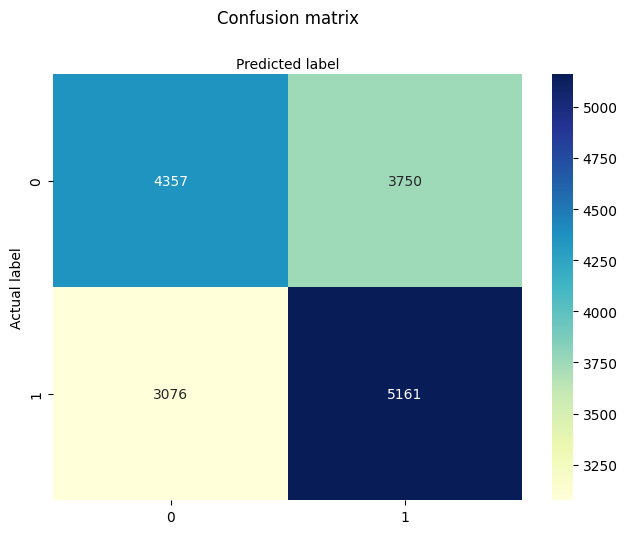

In [22]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
#Creating a heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [23]:
target_names = ['lose', 'win']
print(classification_report(y_test, y_pred, target_names=target_names))
#Standardizing the data does not improve accuracy model

              precision    recall  f1-score   support

        lose       0.59      0.54      0.56      8107
         win       0.58      0.63      0.60      8237

    accuracy                           0.58     16344
   macro avg       0.58      0.58      0.58     16344
weighted avg       0.58      0.58      0.58     16344



In [26]:
#Creating an object with elo ratings using the elosports package
mbb_elo = Elo(k = 20)
allTeams 	= set(mbb_df.team_abbreviation.tolist())

for team in allTeams:
	mbb_elo.addPlayer(team)

currSeason = 2016
for game in mbb_df.iterrows():
  #Normalizing each team after each season has ended
  if game[1].season > currSeason:
    for key in mbb_elo.ratingDict.keys():
      mbb_elo.ratingDict[key] = mbb_elo.ratingDict[key] - ((mbb_elo.ratingDict[key] - 1500) * (1/3.))
    currSeason += 1
  #Updating the ELO rating with each game
  if game[1].team_score > game[1].opponent_team_score:
    mbb_elo.gameOver(game[1].team_abbreviation, game[1].opponent_team_abbreviation,True)
  else:
    mbb_elo.gameOver(game[1].opponent_team_abbreviation, game[1].team_abbreviation,0)

In [27]:
mbb_elo.ratingDict

{'MESS': 1496.3045391611597,
 'SNYP': 1482.6183215097908,
 'QUE': 1489.0634504941986,
 'CIT': 1530.7503829157367,
 'OV': 1488.6446269782784,
 'LUT': 1494.1298642902868,
 'NMSU': 1652.217127343856,
 'MNCH': 1474.4383325166218,
 'BRYN': 1449.7790036944725,
 'MSV': 1462.16257221361,
 'LG': 1483.9835672133474,
 'CUL': 1468.079879806173,
 'WILB': 1445.703111161993,
 'FRO': 1478.4863238581315,
 'NU': 1508.9626725934536,
 'KENT': 1638.8374720292,
 'EUR': 1462.946873741192,
 'YALE': 1653.5176026056474,
 'NBR': 1473.61076086612,
 'ISU': 1379.0383943765755,
 'RND': 1475.0419942179788,
 'LSS': 1475.6168322384049,
 'USD': 1384.4347097839357,
 'UWS': 1501.688727749651,
 'UL': 1621.0985040192206,
 'JUTN': 1491.8413032737296,
 'WES': 1459.2333531569363,
 'UWL': 1494.8039068798084,
 'ECC': 1415.9122276517694,
 'AND': 1473.2697178603294,
 'LAN': 1486.5840510845987,
 'WVTU': 1496.9635939845423,
 'SUU': 1664.1997983466817,
 'NORF': 1605.4327532747034,
 'LEH': 1368.551090345971,
 'WAL': 1459.7547815026944

In [28]:
new_mbb_df_elo = new_mbb_df_rolling_standardized

win_probabilities = []
for game in new_mbb_df_rolling_standardized.iterrows():
  win_probabilities.append(mbb_elo.expectResult(mbb_elo.ratingDict[game[1].team_abbreviation], mbb_elo.ratingDict[game[1].opponent_team_abbreviation]))

new_mbb_df_elo["win_probabilities"] = win_probabilities
new_mbb_df_elo

,field_goal_pct,three_point_field_goal_pct,free_throw_pct,free_throws_made,free_throws_attempted,assists,turnovers,offensive_rebounds,defensive_rebounds,total_rebounds,team_abbreviation,team_home_away,win,opponent_team_abbreviation,win_probabilities
level_1,,,,,,,,,,,,,,,
3,0.382721,1.086552,0.059259,0.041648,-0.026766,0.568189,-0.926186,-0.947478,-0.653244,-1.007733,AAMU,0,1,JVST,0.171901
4,0.446431,1.130089,-0.075497,0.313042,0.406158,0.948747,0.124479,-0.113010,-0.041131,-0.092703,AAMU,0,0,MUR,0.229132
5,0.278053,0.654802,-0.081765,-0.297594,-0.189112,0.568189,0.888599,0.443302,0.570982,0.669823,AAMU,0,0,SLU,0.111985
6,0.018658,-0.197812,-1.119078,-1.383170,-1.000843,0.187631,0.697569,-0.020291,-0.313181,-0.245208,AAMU,0,0,WKU,0.088382
7,-0.304447,-0.328425,-1.545285,-2.604442,-2.083152,0.111520,0.028964,-0.020291,-1.129332,-0.855228,AAMU,0,0,EVAN,0.352784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67779,-0.026849,0.770903,2.171492,0.991527,0.406158,0.187631,-1.021701,0.906896,0.230920,0.669823,YSU,1,1,PFW,0.731566
67780,-0.613900,-0.038173,2.096279,0.584436,-0.134996,0.644301,-1.785821,1.463208,-0.449206,0.466483,YSU,1,0,IUPU,0.752990
67781,-0.968860,-0.760174,1.156116,0.380890,-0.080881,0.415966,-1.403761,1.555926,-0.313181,0.618988,YSU,1,1,IUPU,0.752990


In [29]:
#Splitting the standardized 3-game moving average data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(new_mbb_df_elo[["field_goal_pct", "three_point_field_goal_pct", "free_throw_pct", "free_throws_made", "free_throws_attempted", "assists", "turnovers", "offensive_rebounds", "defensive_rebounds", "total_rebounds", "win_probabilities"]], new_mbb_df_elo["win"])
logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)
y_pred = logistic_model.predict(x_test)

In [30]:
#Creating the confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[5106, 2950],
       [2667, 5621]])

Text(0.5, 427.9555555555555, 'Predicted label')

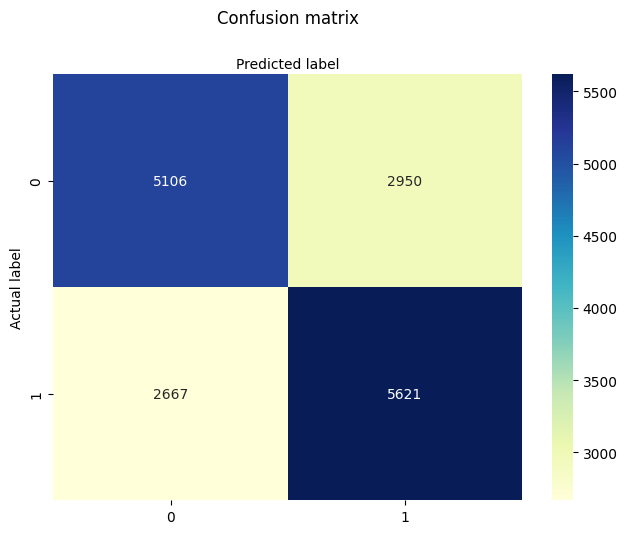

In [31]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
#Creating a heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [32]:
target_names = ['lose', 'win']
print(classification_report(y_test, y_pred, target_names=target_names))
#Including elo ratings improves model accuracy

              precision    recall  f1-score   support

        lose       0.66      0.63      0.65      8056
         win       0.66      0.68      0.67      8288

    accuracy                           0.66     16344
   macro avg       0.66      0.66      0.66     16344
weighted avg       0.66      0.66      0.66     16344



In [33]:
with open('output.csv', 'w') as csv_file:
    writer = csv.writer(csv_file)
    writer.writerow(['Team', 'ELO Rating'])
    for key, value in mbb_elo.ratingDict.items():
       writer.writerow([key, value])

In [53]:
# get importance
importance = logistic_model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: ' + new_mbb_df.columns[i] + '\t\t Score: ' + str(v))
# plot feature importance
# pyplot.bar([new_mbb_df.columns[x] for x in range(len(importance))], importance)
# pyplot.show()

Feature: field_goal_pct		 Score: 0.19297060055606094
Feature: three_point_field_goal_pct		 Score: -0.036873125500304194
Feature: free_throw_pct		 Score: -0.004555603135301803
Feature: free_throws_made		 Score: 0.07390465536397149
Feature: free_throws_attempted		 Score: -0.013096596432030908
Feature: assists		 Score: 0.0847447577407111
Feature: turnovers		 Score: -0.12454917811738088
Feature: offensive_rebounds		 Score: 0.09329235800755278
Feature: defensive_rebounds		 Score: -0.012139836416992471
Feature: total_rebounds		 Score: 0.04207580208179267
Feature: team_home_away		 Score: 3.1224045640442255


In [34]:
new_mbb_df_rolling.to_csv('main_output.csv', index=True)